In [2]:
# Importing basic libraries for data manipulation and analysis
import numpy as np                # For numerical operations
import pandas as pd # For data manipulation and analysis

#Testing the commit 

# Importing libraries for data visualization
import matplotlib.pyplot as plt   # For basic plotting
import seaborn as sns             # For advanced and aesthetically pleasing visualizations

# Importing libraries for handling dates and times
import datetime                   # For datetime operations
import calendar                   # For calendar-related operations

# Importing libraries for statistical analysis
import scipy.stats as stats       # For statistical tests and distributions
from statsmodels.tsa.stattools import adfuller  # For time series analysis (stationarity test)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # For autocorrelation and partial autocorrelation plots

# Setting up display options
pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_rows', 100)  # Set the number of rows to display
sns.set(style="whitegrid")  # Set Seaborn style for plots

# Warnings
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings to keep the output clean

# Sales Data EDA

In [3]:
sales_df = pd.read_csv("/Users/Jamie/OneDrive/Documents/python_ws/project_delta/data/processed_data/sales_data.csv")

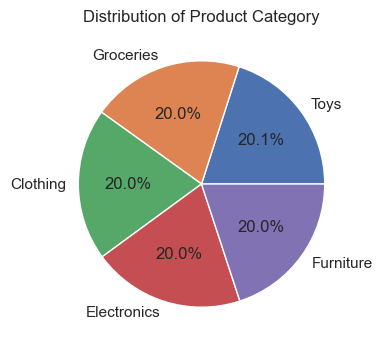

In [4]:
# Aggregate the data to get counts for each Traffic Source
traffic_counts = sales_df['product_category'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 4))
plt.pie(traffic_counts, labels=traffic_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Product Category')

# Display the plot
plt.show()

In [5]:
sales_df['sales'] = sales_df['unit_price'] * sales_df['quantity']

In [6]:
# Convert transaction_date to date-only format
sales_df['transaction_date'] = pd.to_datetime(sales_df['transaction_date']).dt.date

In [7]:
def category_sales(product_name, sales_df):
  if product_name != None:
    category_sales_df = sales_df[sales_df['product_category'] == product_name][['transaction_date', 'sales']]
  else:
    category_sales_df = sales_df
    

  # Step 2: Group by transaction_date and aggregate relevant columns
  aggregated_sales_df = category_sales_df.groupby('transaction_date').agg({
      'sales': 'sum',
      # Add more aggregations if necessary
  }).reset_index()

  # Step 3: Sort by transaction_date
  sales_df = aggregated_sales_df.sort_values(by=['transaction_date'])

  aggregated_sales_df.set_index('transaction_date',inplace=True)
  
  return aggregated_sales_df

def calculate_moving_average(df):
    # Calculate moving averages
  df['MA_20'] = df['sales'].rolling(window=20).mean()
  
  return df

def visualize_sales_df(sales_df, title):
  
  sales_df = calculate_moving_average(sales_df)
  # Plot the sales and moving averages
  plt.figure(figsize=(14, 8))
  plt.plot(sales_df['sales'], label='Daily Sales', color='lightgray')
  plt.plot(sales_df['MA_20'], label='20-Day MA', color='blue')
  plt.title(title)
  plt.xlabel('Transaction Date')
  plt.ylabel('Sales')
  plt.legend()
  plt.xticks(rotation=45)
  plt.grid(True)
  plt.show()

In [8]:
sales_df_all = category_sales(None, sales_df)


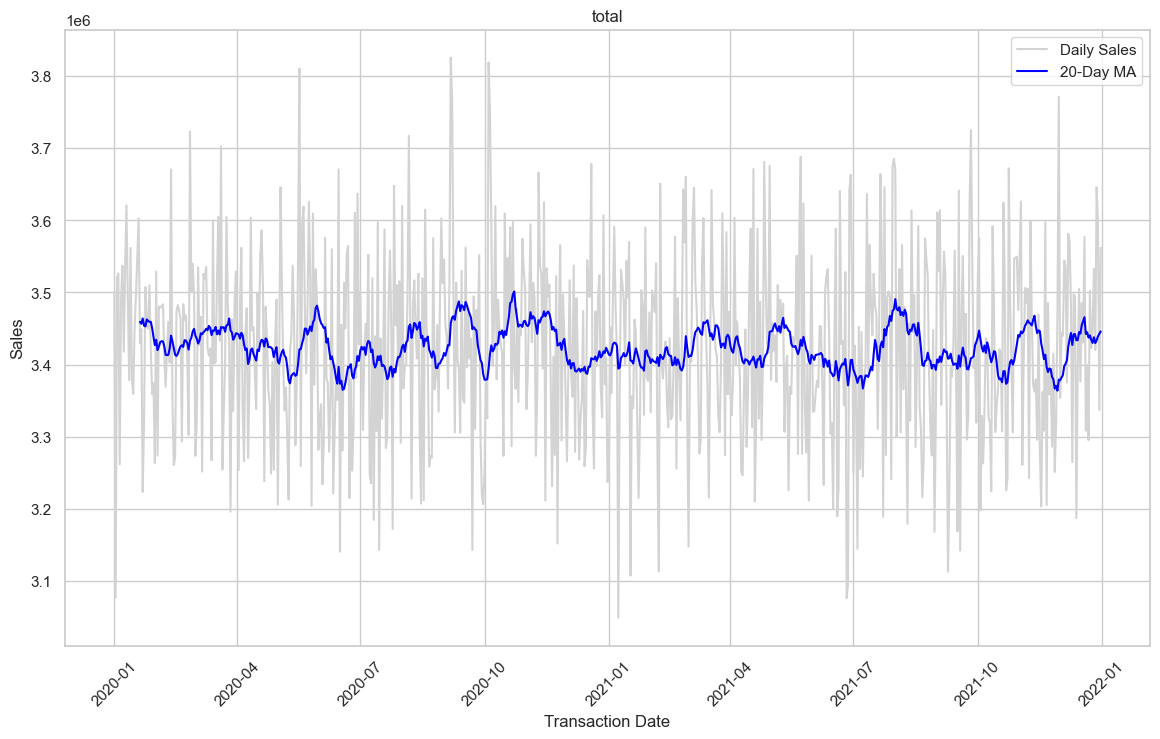

In [9]:
visualize_sales_df(sales_df_all, 'total')

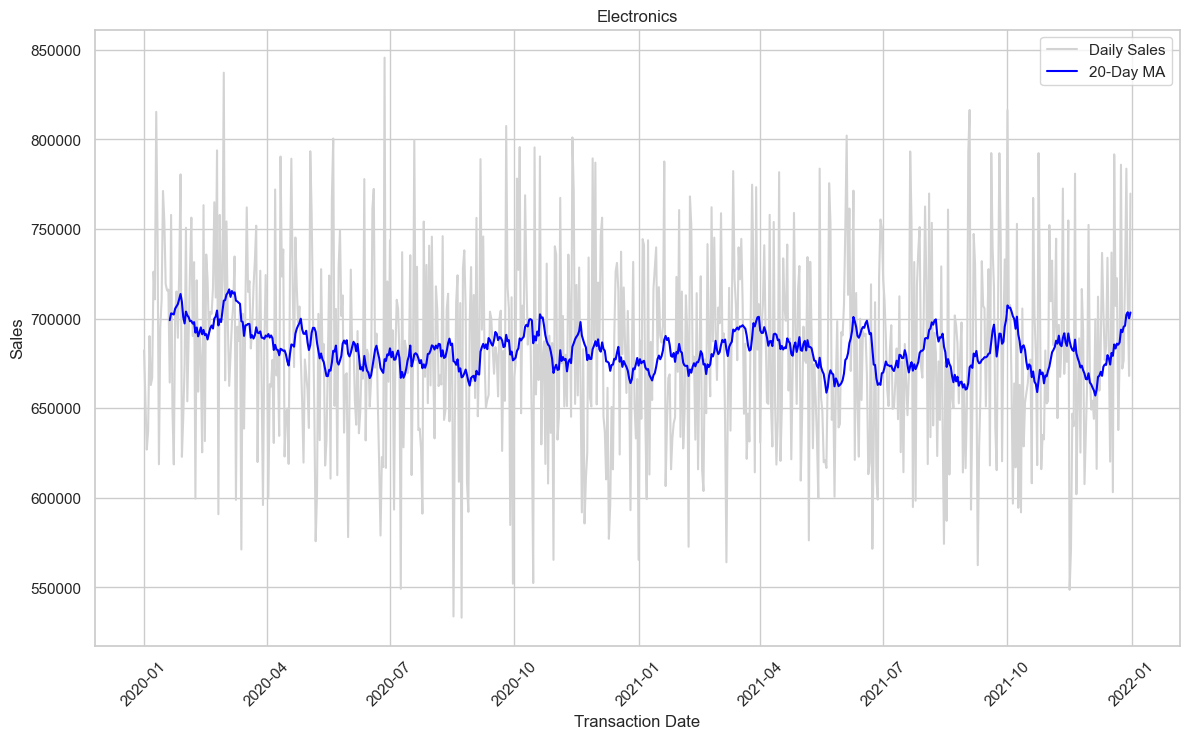

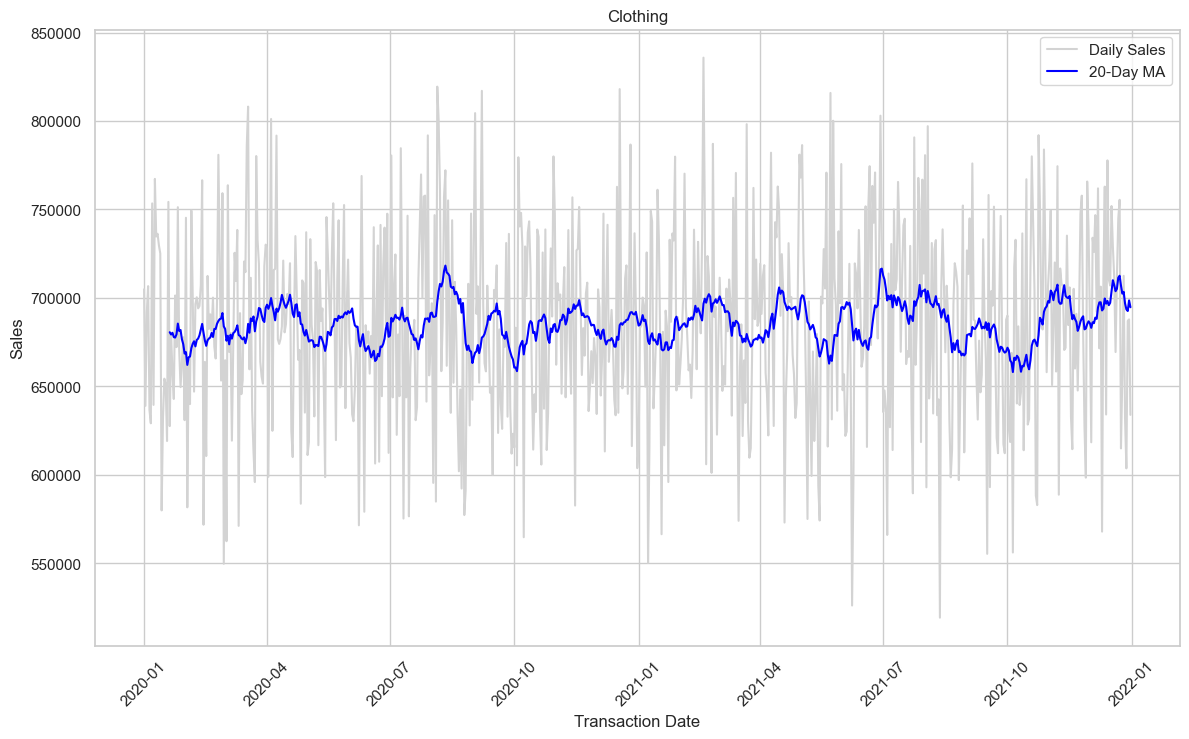

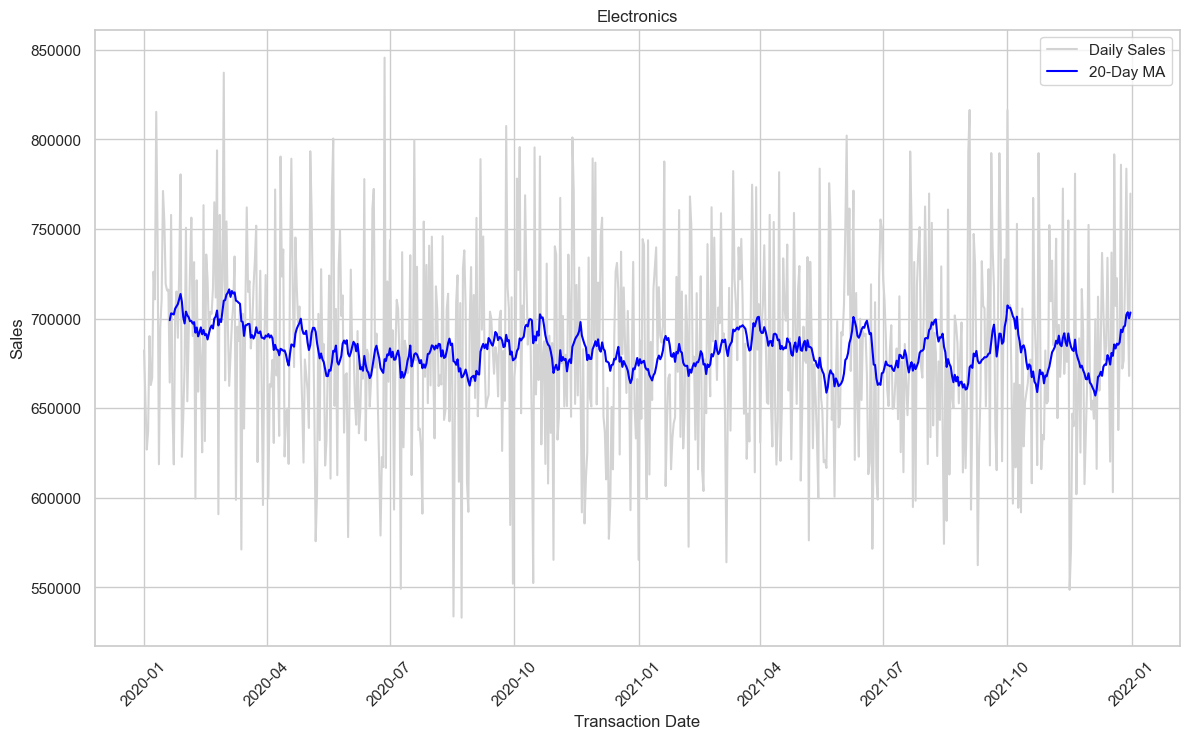

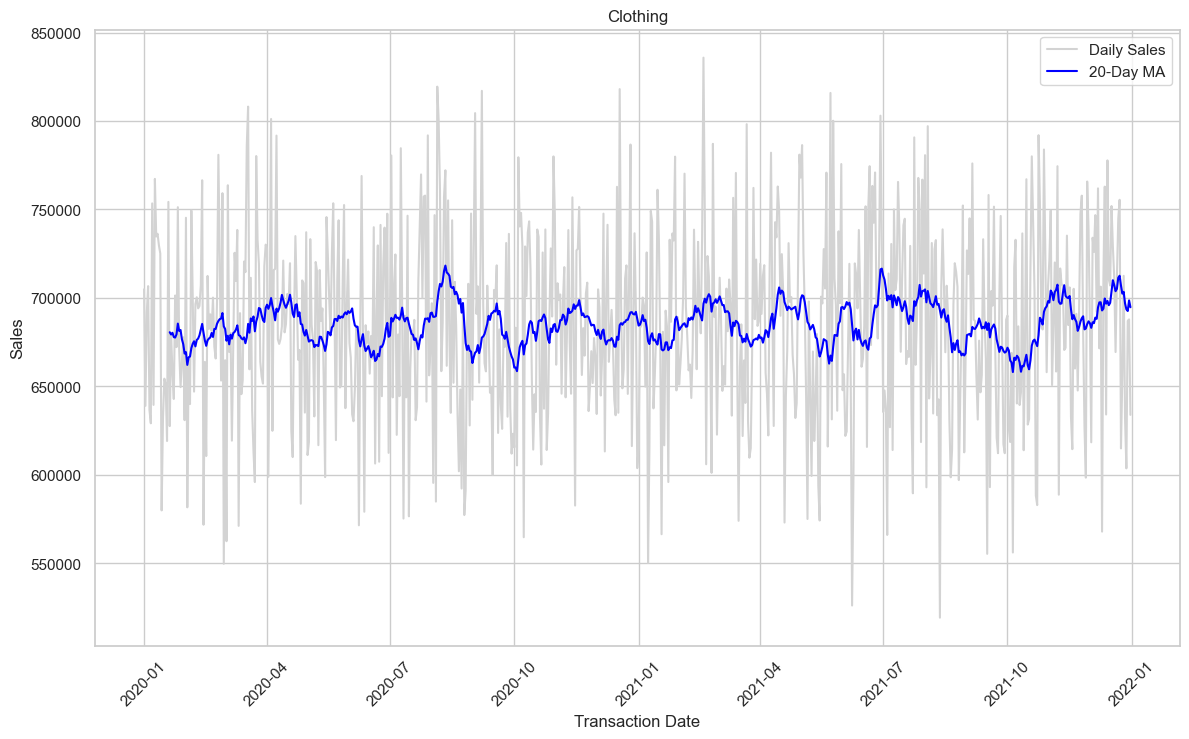

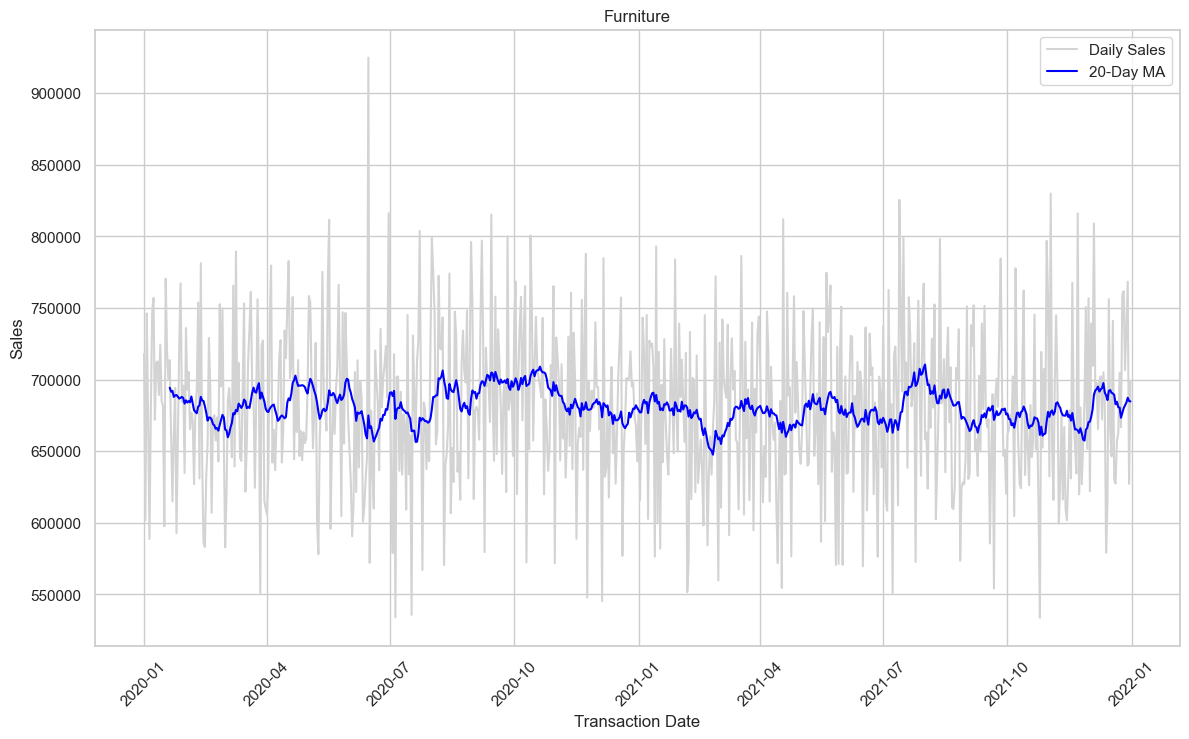

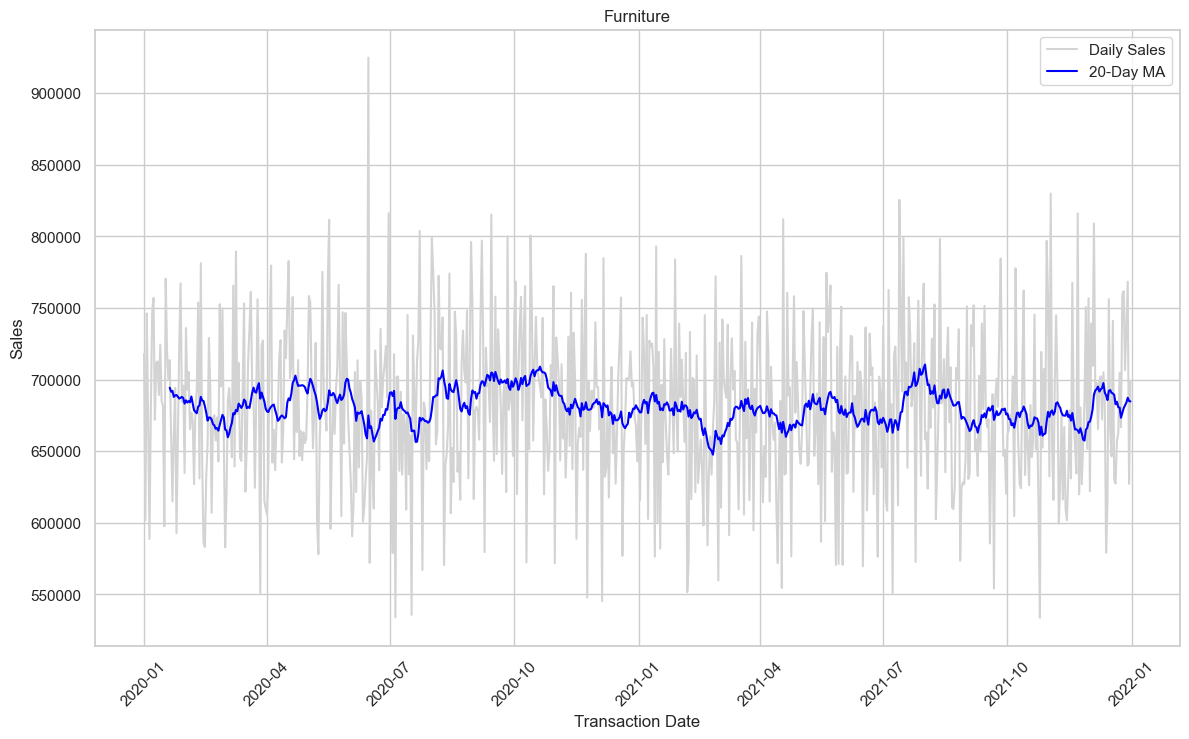

In [10]:
category = ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Furniture', 'Furniture']

for i in category:
  viz_sales_df = category_sales(i, sales_df)
  visualize_sales_df(viz_sales_df, i)

In [11]:
def total_sales_category(df, group_by_column='product_category', sales_column='sales', sort=False, handle_na=True):
    # Handle missing sales values if requested
    if handle_na:
        df[sales_column] = df[sales_column].fillna(0)
    
    # Group by the specified column and sum the sales for each group
    grouped_sales = df.groupby(group_by_column)[sales_column].sum().reset_index()
    
    # Sort by sales in descending order if requested
    if sort:
        grouped_sales = grouped_sales.sort_values(by=sales_column, ascending=False)
    
    # Format the sales column for better readability
    grouped_sales[sales_column] = grouped_sales[sales_column].apply(lambda x: f"${x:,.2f}")
    
    return grouped_sales

# Example usage
print(total_sales_category(sales_df, sort=True))


  product_category            sales
3        Groceries  $502,824,238.10
4             Toys  $502,740,937.39
0         Clothing  $500,859,262.72
1      Electronics  $499,369,939.09
2        Furniture  $497,886,231.66


In [12]:
def total_sales_store(df, group_by_column='store_location', sales_column='sales', sort=False, handle_na=True):
    # Handle missing sales values if requested
    if handle_na:
        df[sales_column] = df[sales_column].fillna(0)
    
    # Group by the specified column and sum the sales for each group
    grouped_sales = df.groupby(group_by_column)[sales_column].sum().reset_index()
    
    # Sort by sales in descending order if requested
    if sort:
        grouped_sales = grouped_sales.sort_values(by=sales_column, ascending=False)
    
    # Format the sales column for better readability
    grouped_sales[sales_column] = grouped_sales[sales_column].apply(lambda x: f"${x:,.2f}")
    
    return grouped_sales

# Example usage
print(total_sales_store(sales_df, sort=True))

  store_location            sales
2     Location C  $627,456,261.56
1     Location B  $626,326,741.60
0     Location A  $626,199,231.67
3     Location D  $623,698,374.13


In [13]:
def total_item_purchased(df):
    # Calculate total items purchased, returned, and total returned value
    total_purchased = df['total_items_purchased'].sum()
    total_returned = df['total_returned_items'].sum()
    total_returned_value = df['total_returned_value'].sum()
    
    # Format total returned value as currency
    formatted_total_returned_value = f"${total_returned_value:,.2f}"
    
    # Calculate the percentage of valid (non-returned) and returned items
    percentage_valid_items = ((total_purchased - total_returned) / total_purchased * 100)
    percentage_returned_items = (total_returned / total_purchased) * 100
    
    # Return results as a dictionary
    return {
        'total_purchased': total_purchased,
        'total_returned': total_returned,
        'percentage_valid_items': percentage_valid_items,
        'percentage_returned_items': percentage_returned_items,
        'total_returned_value': formatted_total_returned_value
    }

# Call the function
results = total_item_purchased(sales_df)

# Display the results
print(f"Total Purchased Items: {results['total_purchased']}")
print(f"Total Returned Items: {results['total_returned']}")
print(f"Valid Items Percentage: {results['percentage_valid_items']:.2f}%")
print(f"Returned Items Percentage: {results['percentage_returned_items']:.2f}%")
print(f"Total Returned Value: {results['total_returned_value']}")

Total Purchased Items: 250042763
Total Returned Items: 4498142
Valid Items Percentage: 98.20%
Returned Items Percentage: 1.80%
Total Returned Value: $500,387,837.37


# Customer Information EDA


In [14]:
customer_info_df = pd.read_csv("/Users/Jamie/OneDrive/Documents/python_ws/project_delta/data/processed_data/customer_information_data.csv")

In [15]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   Unnamed: 0          1000000 non-null  int64 
 1   customer_id         1000000 non-null  int64 
 2   age                 1000000 non-null  int64 
 3   gender              1000000 non-null  object
 4   income_bracket      1000000 non-null  object
 5   loyalty_program     1000000 non-null  bool  
 6   membership_years    1000000 non-null  int64 
 7   churned             1000000 non-null  bool  
 8   marital_status      1000000 non-null  object
 9   number_of_children  1000000 non-null  int64 
 10  education_level     1000000 non-null  object
 11  occupation          1000000 non-null  object
dtypes: bool(2), int64(5), object(5)
memory usage: 78.2+ MB


In [16]:
customer_info_df.head()

,Unnamed: 0,customer_id,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation
0,0,1,56,Other,High,False,0,False,Divorced,3,Bachelor's,Self-Employed
1,1,2,69,Female,Medium,False,2,False,Married,2,PhD,Unemployed
2,2,3,46,Female,Low,False,5,False,Married,3,Bachelor's,Self-Employed
3,3,4,32,Female,Low,False,0,False,Divorced,2,Master's,Employed
4,4,5,60,Female,Low,True,7,True,Divorced,2,Bachelor's,Employed


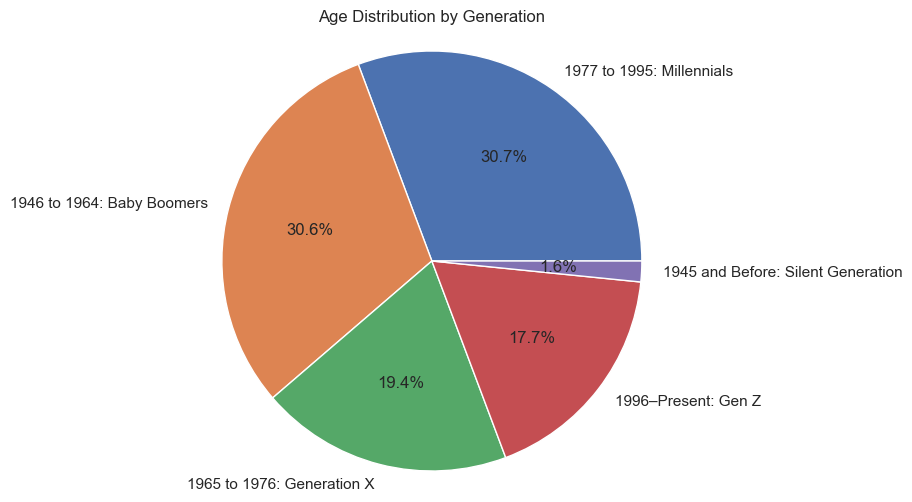

In [17]:
from datetime import datetime

# Get the current year
current_year = datetime.now().year

# Assume you have a DataFrame 'customer_info_df' with an 'age' column
def assign_generation(age):
    birth_year = current_year - age
    if birth_year <= 1945:
        return '1945 and Before: Silent Generation'
    elif 1946 <= birth_year <= 1964:
        return '1946 to 1964: Baby Boomers'
    elif 1965 <= birth_year <= 1976:
        return '1965 to 1976: Generation X'
    elif 1977 <= birth_year <= 1995:
        return '1977 to 1995: Millennials'
    elif birth_year >= 1996:
        return '1996–Present: Gen Z'
    else:
        return 'Unknown'

In [18]:
def visualize_distribution(df, column):
  # Calculate the count for each generation
  count = df[column].value_counts()

  # Create the pie chart
  plt.figure(figsize=(8, 6))
  plt.pie(count, labels=count.index, autopct='%1.1f%%')
  plt.title(column, ' distribution')
  plt.axis('equal')
  plt.show()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot the distribution of numerical columns
def plot_numerical_distribution(df, num_cols):
    for col in num_cols:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# Function to plot the distribution of categorical columns
def plot_categorical_distribution(df, cat_cols):
    for col in cat_cols:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()

# Wrapper function to perform all EDA steps
def perform_eda(df):
    # Define numerical and categorical columns
    num_cols = [ 'membership_years', 'number_of_children']
    cat_cols = ['gender', 'income_bracket', 'loyalty_program', 'churned', 
                'marital_status', 'education_level', 'occupation', 'generation']

    # 1. Plot distribution of numerical columns
    plot_numerical_distribution(df, num_cols)

    # 2. Plot distribution of categorical columns
    plot_categorical_distribution(df, cat_cols)


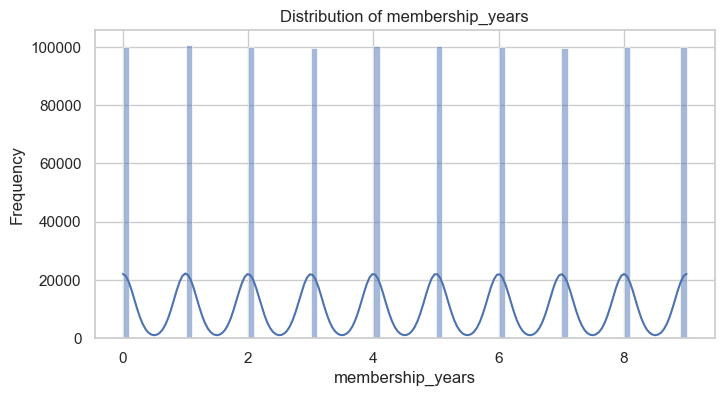

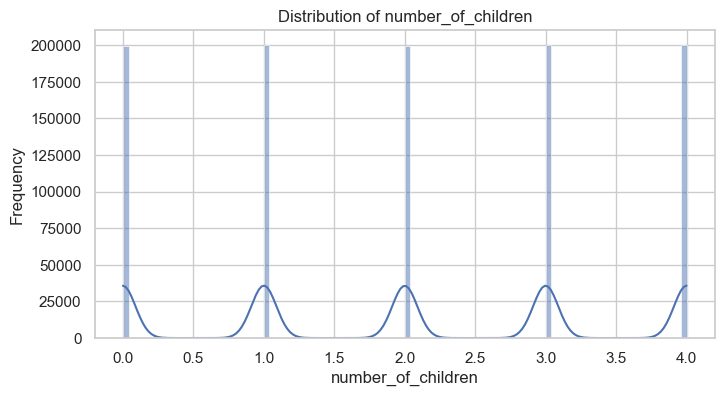

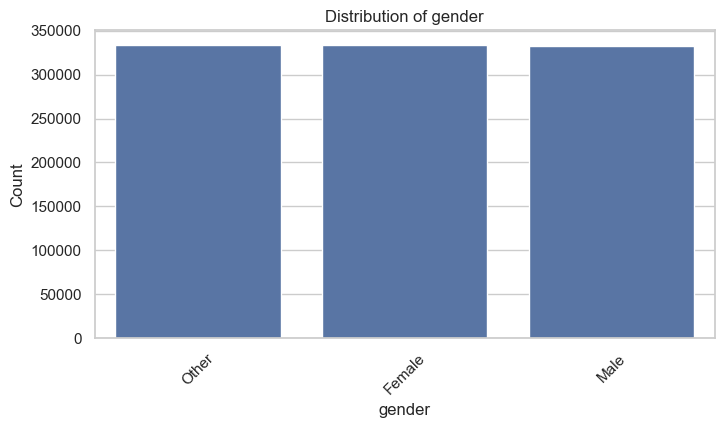

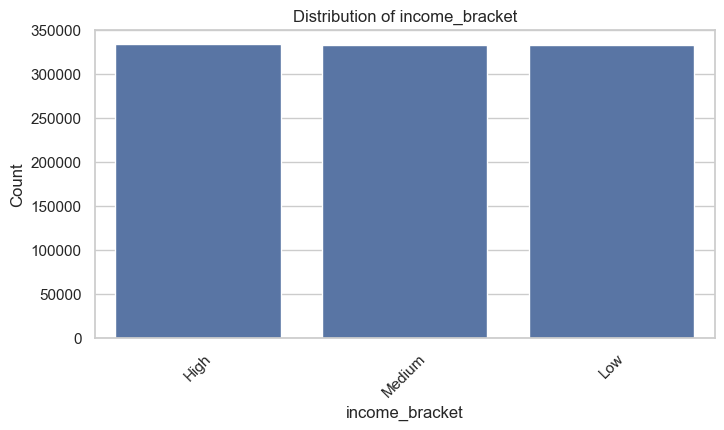

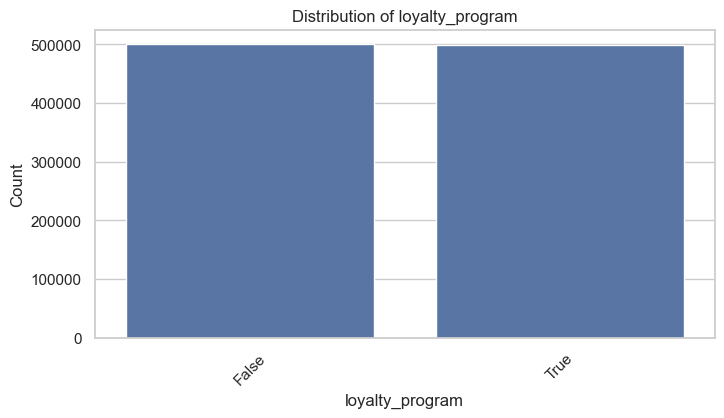

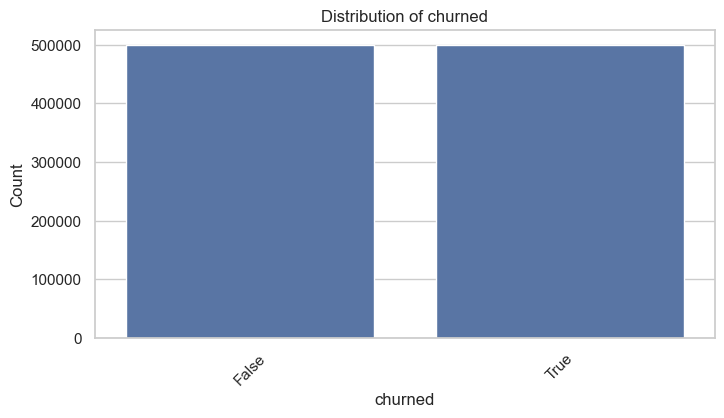

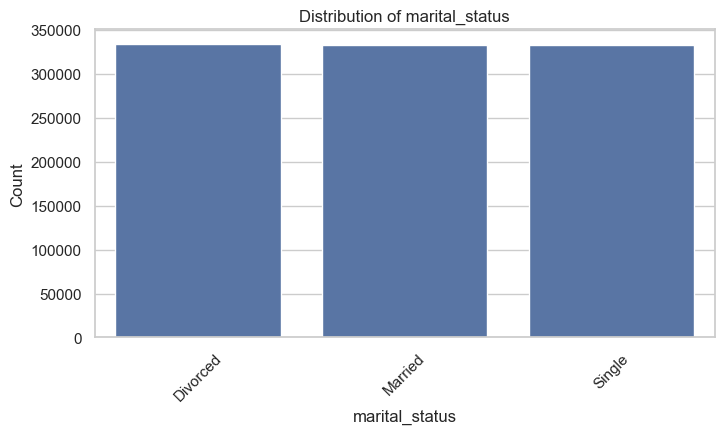

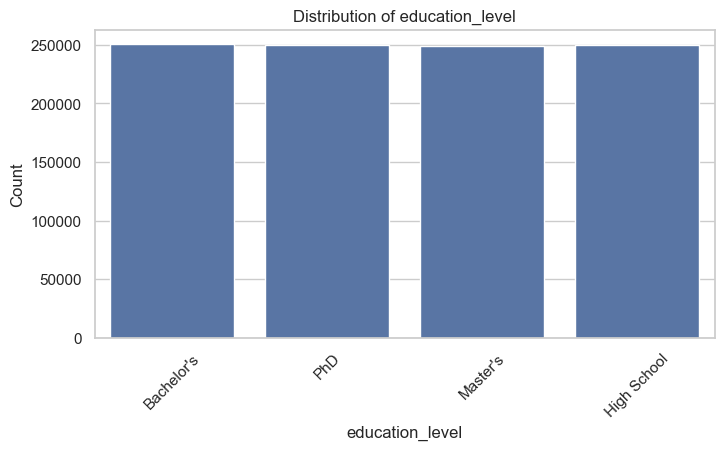

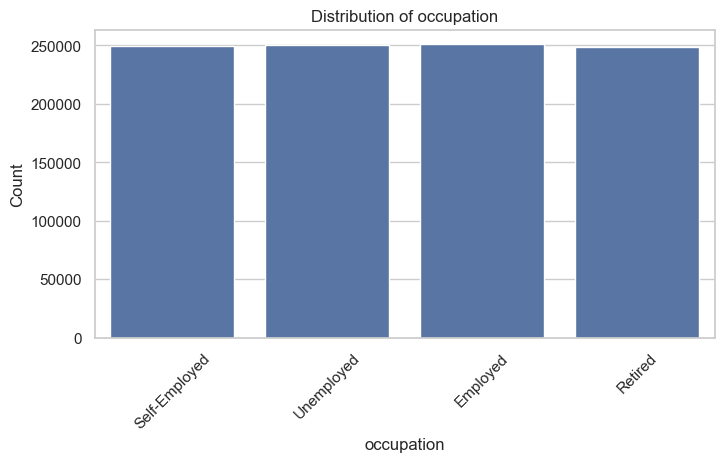

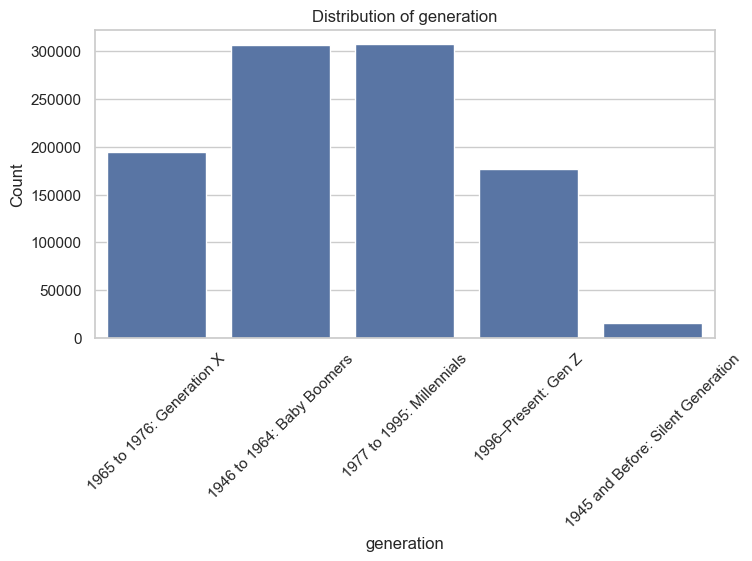

In [24]:
perform_eda(customer_info_df)

In [30]:
# Function to calculate the number of churned or non-churned customers by generation
def churn_by_generation(df):
    # Group by 'generation' and 'churned' and count occurrences
    churn_data = df.groupby(['generation', 'churned']).size().reset_index(name='count')
    
    # Pivot table for a clearer view
    churn_pivot = churn_data.pivot(index='generation', columns='churned', values='count').fillna(0)
    
    return churn_pivot
  
churn_by_generation(customer_info_df)


churned,False,True
generation,,
1945 and Before: Silent Generation,8113,7836
1946 to 1964: Baby Boomers,152984,153055
1965 to 1976: Generation X,97094,97066
1977 to 1995: Millennials,153511,153489
1996–Present: Gen Z,88569,88283
